In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
%matplotlib inline

# 20180731実験結果の確認

In [2]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie
import cv2

In [4]:
img = cv2.imread('/mnt/recordings/AnalysisResult/Seno/experiment/20180731/C001H001S0001/C001H001S0001000005.png',0)

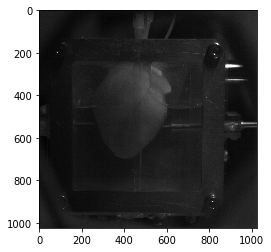

In [14]:
plt.imshow(img, cmap='gray')

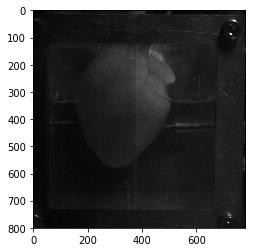

In [19]:
plt.imshow(img[120:920, 100:880], cmap='gray')

In [20]:
plt.imsave('/mnt/recordings/AnalysisResult/Seno/experiment/20180731/analysis/S0001/tissue_bath.png', img[120:920, 100:880], cmap='gray')

In [34]:
raw = RawCam(path='/mnt/recordings/AnalysisResult/Seno/experiment/20180731/C001H001S0005/', cam_type='sa4', image_width=512, image_height=512, frame_start=1000, frame_end=2000)

In [48]:
for i in range(1000):
    num = "{0:04d}".format(i)
    plt.imshow(raw.data[i, :400, :400], cmap='gray', vmin=np.min(raw.data), vmax=np.max(raw.data))
    plt.xticks([])
    plt.yticks([])
    plt.text(15, 50, '%s (ms)' % num, fontsize=18, color='white')
    plt.savefig('/mnt/recordings/AnalysisResult/Seno/experiment/20180731/analysis/S0005/raw/%s.png' % num, dpi=300)
    plt.close()

In [49]:
import subprocess
subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/experiment/20180731/analysis/S0005/raw/%04d.png" \
                 -c:v libx264 -pix_fmt yuv420p -qscale 0 \
                 "/mnt/recordings/AnalysisResult/Seno/experiment/20180731/analysis/S0005/raw.mp4"', shell=True)

0